In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
from bs4 import BeautifulSoup
import progressbar

In [2]:
ur = "https://housing.com/rent/search-P679xe73u28050522_5bp8fs9w5gm0jsim_5y0mqgd7zgqvfm81_g7khohd393v9det_61rq7asnhahkwmtmU1v69?listingId=8382526"

In [3]:
page = requests.get(ur)

In [4]:
page.status_code

200

In [5]:
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

In [6]:
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get(ur)
time.sleep(2)  # Allow 2 seconds for the web page to open
scroll_pause_time = 1 # You can set your own pause time. My laptop is a bit slow so I use 1 sec
screen_height = driver.execute_script("return window.screen.height;")   # get the screen height of the web
i = 1

while True:
    # scroll one screen height each time
    driver.execute_script("window.scrollTo(0, {screen_height}*{i});".format(screen_height=screen_height, i=i))  
    i += 1
    time.sleep(scroll_pause_time)
    # update scroll height each time after scrolled, as the scroll height can change after we scrolled the page
    scroll_height = driver.execute_script("return document.body.scrollHeight;")  
    # Break the loop when the height we need to scroll to is larger than the total scroll height
    if (screen_height) * i > scroll_height:
        break



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\YASH\.wdm\drivers\chromedriver\win32\98.0.4758.102]
C:\Users\YASH\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  """Entry point for launching an IPython kernel.


In [7]:
soup = BeautifulSoup(driver.page_source, "html.parser")

<html lang="en" prefix="og: http://ogp.me/ns# website: http://ogp.me/ns/website#"><head><link href="//c.housingcdn.com" rel="preconnect"/><link href="//is1-3.housingcdn.com" rel="preconnect"/><link href="//eventrouter.housing.com" rel="preconnect"/><link href="//img.youtube.com" rel="preconnect"/><link href="//is1-2.housingcdn.com" rel="preconnect"/><script>(function(){window.ga = window.ga || function () { (ga.q = ga.q || []).push(arguments) }; ga.l = +new Date;
              ga('create', 'UA-64495538-1');
              ga('set', 'transport', 'beacon');})();(function(){window.firePixel = window.firePixel || function (pixelEvent) {
            (firePixel.q = firePixel.q || []).push(pixelEvent)
          }})();var _paq = window._paq = window._paq || [];
      /* tracker methods like "setCustomDimension" should be called before "trackPageView" */
      _paq.push(['trackPageView']);
      _paq.push(['enableLinkTracking']);</script><script async=""></script><link as="script" href="https://
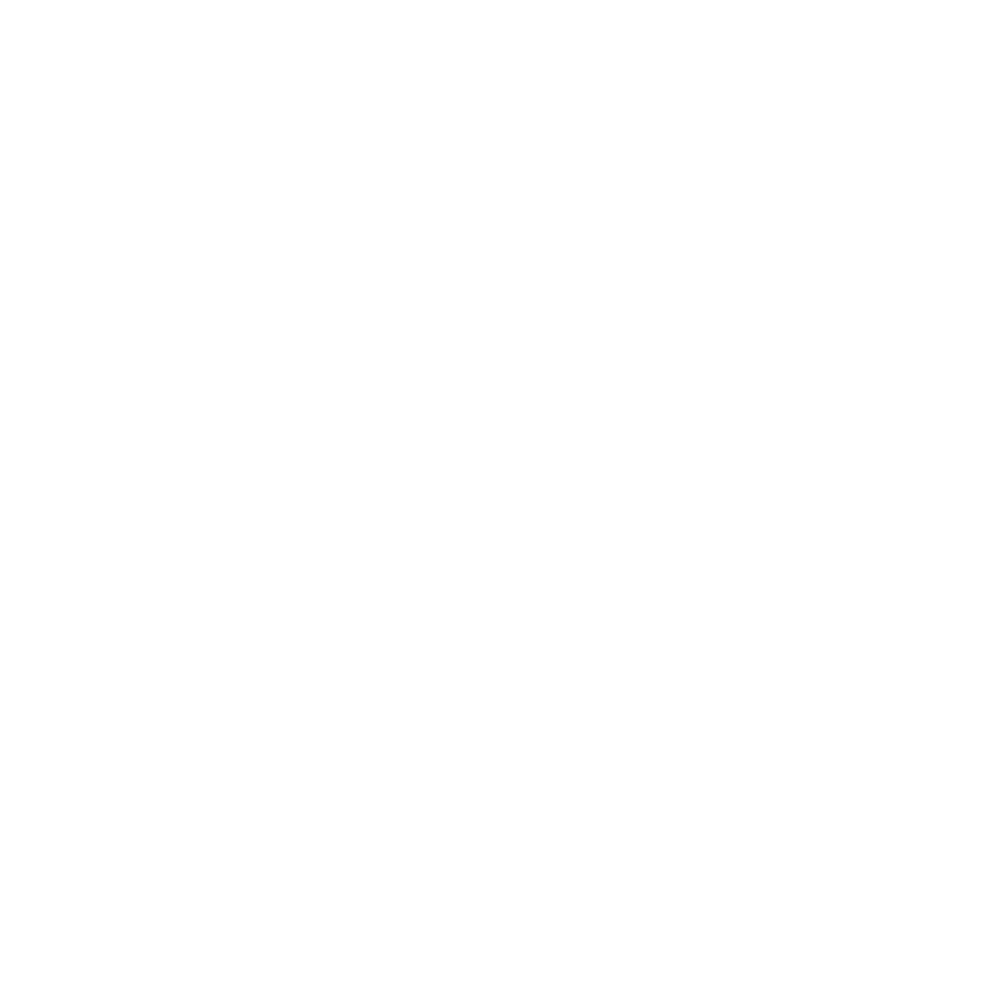
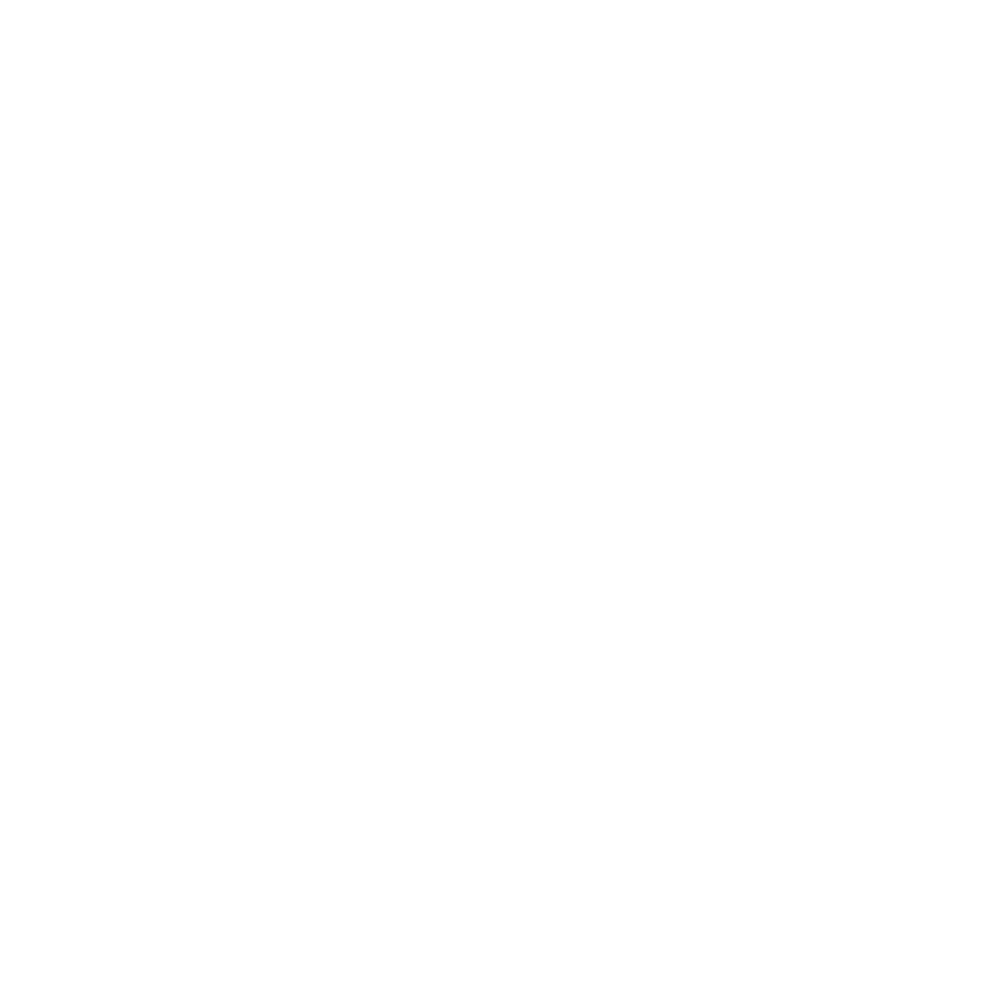

In [8]:
soup

In [9]:
f = soup.find_all('div',attrs = {"class":"css-syn1z7"})

In [10]:
price = []
for i in f:                                              #1css-1cxwewr
    b = i.find('div',attrs = {"class":"css-1cxwewr"})
    if b is not None:
        price.append(i.text)
    else:
        price.append('NA')
len(price)

530

In [11]:
price[1]

'44,0003 BHK Flat for rent in Nanakaramguda, HyderabadGolf Edge,Financial District, Nanakaramguda,HyderabadFully Furnished2000 sq.ftOur fees only Rs. 10K + GST for an apartment in Hyderabad.\nProfessional Property Management. Multiple direct options available.\nFully Furnished 3 BHK Is Available In Golf Edge Located In Financial District,\nHyderabad.Read moreAzuro.inHousing ExpertContactAuthentic ListingsTrusted Agent'

In [12]:
location = []
for i in f:
    b = i.find('div',{"class":"css-26olqx"})                                #css-16drx2b
    if b is not None:
        location.append(b.text)
    else:
        location.append('NA')
len(location)

530

In [13]:
location[100]

'Nandini arcade,Ameerpet, Hyderabad'

In [14]:
bhk = []
for i in f:                #class="css-11nfaq3"
    b = i.find('div',{"class":"css-11nfaq3"})
    if b is not None:
        bhk.append(b.text)
    else:
        bhk.append('NA')
len(bhk)

530

In [15]:
bhk[239]

'1 BHK Flat for rent in Begumpet, Hyderabad'

In [16]:
sft = []
for i in f:
    b = i.find('div',{"class":"css-14teu4h"})
    if b is not None:
        sft.append(b.text)
    else:
        sft.append('NA')
len(sft)

530

In [17]:
sft[239]

'Unfurnished850 sq.ft'

In [18]:
rupee = []
for i in f:
    b = i.find('div',{"class":"css-1cxwewr"})
    if b is not None:
        rupee.append(b.text)
    else:
        rupee.append("NA")
len(rupee)

530

In [19]:
rupee[100]

'13,700'

In [20]:
description = []
for i in f:
    b = i.find('div',{"class":"css-ualawn"})
    if b is not None:
        description.append(b.text)
    else:
        description.append("NA")
len(description)

530

In [21]:
description[239]

'Check this beautiful 1 BHK Apartment available for rent in Hyderabad. Nestled at a prime location in Begumpet, it is an ideal home for those looking for a modern lifestyle. The Apartment is Furnished, available for affordable rent. This 1 BHK unit is inside a gated society equipped with various amenities and ample greenery. The Apartment is thoughtfully designed to ensure a comfortable living. It includes 1 bedroom and 1 bathroom. Out of a total 1 floors, this 1 BHK unit is built on floor 1. It also has 0 balcony that have been spaciously designed and allow you to enjoy the magnificent views o...Read more'

In [22]:
list(price)[50]

'12,5002 BHK Independent House for rent in Bharat Heavy Electricals Limited, HyderabadBharat Heavy Electricals Limited, HyderabadSemi Furnished997 sq.ftGround floor is available with car parking outside.Read morePRPERLA RAGHURAMOwnerContact'

In [23]:
po = re.compile("\d\d,\d+")
re.search(po.price).group()

AttributeError: 're.Pattern' object has no attribute 'price'

In [24]:
df = pd.DataFrame({'price' : price,'location':location,'bhk':bhk,'sft':sft,'description':description})

In [25]:
df.head()

,price,location,bhk,sft,description
0,"25,0003 BHK Apartment for rent in GachibowliRa...","Rajiv Gandhi Nagar, Gachibowli, Hyderabad",3 BHK Apartment for rent in Gachibowli,Fully Furnished1700 sq.ft,Our fees only Rs. 10K + GST for an apartment i...
1,"44,0003 BHK Flat for rent in Nanakaramguda, Hy...","Golf Edge,Financial District, Nanakaramguda,Hy...","3 BHK Flat for rent in Nanakaramguda, Hyderabad",Fully Furnished2000 sq.ft,Our fees only Rs. 10K + GST for an apartment i...
2,"28,0003 BHK Flat for rent in Madhapur, Hyderab...","Mega Hills, Madhapur,Hyderabad","3 BHK Flat for rent in Madhapur, Hyderabad",Semi Furnished2000 sq.ft,3bhk brand new semi Furnished flat available...
3,"21,0002 BHK Flat for rent in Kondapur, Hyderab...","Kondapur sri ram nagar colony,Kondapur, Hyderabad","2 BHK Flat for rent in Kondapur, Hyderabad",Fully Furnished1300 sq.ft,This is a modern and stylish home available fo...
4,"17,0002 BHK Flat for rent in Kondapur, Hyderab...","Police Colony, Kondapur,Hyderabad","2 BHK Flat for rent in Kondapur, Hyderabad",Semi Furnished1100 sq.ft,It is a beautiful Apartment. Semi-furnished pr...


In [26]:
df

,price,location,bhk,sft,description
0,"25,0003 BHK Apartment for rent in GachibowliRa...","Rajiv Gandhi Nagar, Gachibowli, Hyderabad",3 BHK Apartment for rent in Gachibowli,Fully Furnished1700 sq.ft,Our fees only Rs. 10K + GST for an apartment i...
1,"44,0003 BHK Flat for rent in Nanakaramguda, Hy...","Golf Edge,Financial District, Nanakaramguda,Hy...","3 BHK Flat for rent in Nanakaramguda, Hyderabad",Fully Furnished2000 sq.ft,Our fees only Rs. 10K + GST for an apartment i...
2,"28,0003 BHK Flat for rent in Madhapur, Hyderab...","Mega Hills, Madhapur,Hyderabad","3 BHK Flat for rent in Madhapur, Hyderabad",Semi Furnished2000 sq.ft,3bhk brand new semi Furnished flat available...
3,"21,0002 BHK Flat for rent in Kondapur, Hyderab...","Kondapur sri ram nagar colony,Kondapur, Hyderabad","2 BHK Flat for rent in Kondapur, Hyderabad",Fully Furnished1300 sq.ft,This is a modern and stylish home available fo...
4,"17,0002 BHK Flat for rent in Kondapur, Hyderab...","Police Colony, Kondapur,Hyderabad","2 BHK Flat for rent in Kondapur, Hyderabad",Semi Furnished1100 sq.ft,It is a beautiful Apartment. Semi-furnished pr...
...,...,...,...,...,...
525,"34,0003 BHK Flat for rent in Kukatpally, Hyder...","Lodha Meridian,KPHB Phase 15, Kukatpally,Hyder...","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished2000 sq.ft,Our fees only Rs. 10K + GST for an apartment i...
526,"24,0003 BHK Flat for rent in Kukatpally, Hyder...","Malaysian Township,KPHB Phase 15, Kukatpally,H...","3 BHK Flat for rent in Kukatpally, Hyderabad",Fully Furnished1500 sq.ft,Our fees only Rs. 10K + GST for an apartment i...
527,"23,0003 BHK Flat for rent in Kukatpally, Hyder...","Malyasian TownShip,KPHB Phase 15, Kukatpally,H...","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished1008 sq.ft,Our fees only Rs. 10K + GST for an apartment i...
528,"24,0003 BHK Flat for rent in Kukatpally, Hyder...","Madava RESIDENCY,Kukatpally, Hyderabad","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished1152 sq.ft,Our fees only Rs. 10K + GST for an apartment i...


In [27]:
rupee[30]

'25,000'

In [28]:
df.drop(['price'],axis ='columns',inplace = True)

In [29]:
df

,location,bhk,sft,description
0,"Rajiv Gandhi Nagar, Gachibowli, Hyderabad",3 BHK Apartment for rent in Gachibowli,Fully Furnished1700 sq.ft,Our fees only Rs. 10K + GST for an apartment i...
1,"Golf Edge,Financial District, Nanakaramguda,Hy...","3 BHK Flat for rent in Nanakaramguda, Hyderabad",Fully Furnished2000 sq.ft,Our fees only Rs. 10K + GST for an apartment i...
2,"Mega Hills, Madhapur,Hyderabad","3 BHK Flat for rent in Madhapur, Hyderabad",Semi Furnished2000 sq.ft,3bhk brand new semi Furnished flat available...
3,"Kondapur sri ram nagar colony,Kondapur, Hyderabad","2 BHK Flat for rent in Kondapur, Hyderabad",Fully Furnished1300 sq.ft,This is a modern and stylish home available fo...
4,"Police Colony, Kondapur,Hyderabad","2 BHK Flat for rent in Kondapur, Hyderabad",Semi Furnished1100 sq.ft,It is a beautiful Apartment. Semi-furnished pr...
...,...,...,...,...
525,"Lodha Meridian,KPHB Phase 15, Kukatpally,Hyder...","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished2000 sq.ft,Our fees only Rs. 10K + GST for an apartment i...
526,"Malaysian Township,KPHB Phase 15, Kukatpally,H...","3 BHK Flat for rent in Kukatpally, Hyderabad",Fully Furnished1500 sq.ft,Our fees only Rs. 10K + GST for an apartment i...
527,"Malyasian TownShip,KPHB Phase 15, Kukatpally,H...","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished1008 sq.ft,Our fees only Rs. 10K + GST for an apartment i...
528,"Madava RESIDENCY,Kukatpally, Hyderabad","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished1152 sq.ft,Our fees only Rs. 10K + GST for an apartment i...


In [30]:
df['price'] = rupee

In [31]:
df

,location,bhk,sft,description,price
0,"Rajiv Gandhi Nagar, Gachibowli, Hyderabad",3 BHK Apartment for rent in Gachibowli,Fully Furnished1700 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"25,000"
1,"Golf Edge,Financial District, Nanakaramguda,Hy...","3 BHK Flat for rent in Nanakaramguda, Hyderabad",Fully Furnished2000 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"44,000"
2,"Mega Hills, Madhapur,Hyderabad","3 BHK Flat for rent in Madhapur, Hyderabad",Semi Furnished2000 sq.ft,3bhk brand new semi Furnished flat available...,"28,000"
3,"Kondapur sri ram nagar colony,Kondapur, Hyderabad","2 BHK Flat for rent in Kondapur, Hyderabad",Fully Furnished1300 sq.ft,This is a modern and stylish home available fo...,"21,000"
4,"Police Colony, Kondapur,Hyderabad","2 BHK Flat for rent in Kondapur, Hyderabad",Semi Furnished1100 sq.ft,It is a beautiful Apartment. Semi-furnished pr...,"17,000"
...,...,...,...,...,...
525,"Lodha Meridian,KPHB Phase 15, Kukatpally,Hyder...","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished2000 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"34,000"
526,"Malaysian Township,KPHB Phase 15, Kukatpally,H...","3 BHK Flat for rent in Kukatpally, Hyderabad",Fully Furnished1500 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"24,000"
527,"Malyasian TownShip,KPHB Phase 15, Kukatpally,H...","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished1008 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"23,000"
528,"Madava RESIDENCY,Kukatpally, Hyderabad","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished1152 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"24,000"


In [32]:
df['bhk'][0]

'3 BHK Apartment for rent in Gachibowli'

In [33]:
df['no_beds'] = df['bhk'].apply(lambda x : re.search('\d+',x).group())

In [34]:
df

,location,bhk,sft,description,price,no_beds
0,"Rajiv Gandhi Nagar, Gachibowli, Hyderabad",3 BHK Apartment for rent in Gachibowli,Fully Furnished1700 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"25,000",3
1,"Golf Edge,Financial District, Nanakaramguda,Hy...","3 BHK Flat for rent in Nanakaramguda, Hyderabad",Fully Furnished2000 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"44,000",3
2,"Mega Hills, Madhapur,Hyderabad","3 BHK Flat for rent in Madhapur, Hyderabad",Semi Furnished2000 sq.ft,3bhk brand new semi Furnished flat available...,"28,000",3
3,"Kondapur sri ram nagar colony,Kondapur, Hyderabad","2 BHK Flat for rent in Kondapur, Hyderabad",Fully Furnished1300 sq.ft,This is a modern and stylish home available fo...,"21,000",2
4,"Police Colony, Kondapur,Hyderabad","2 BHK Flat for rent in Kondapur, Hyderabad",Semi Furnished1100 sq.ft,It is a beautiful Apartment. Semi-furnished pr...,"17,000",2
...,...,...,...,...,...,...
525,"Lodha Meridian,KPHB Phase 15, Kukatpally,Hyder...","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished2000 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"34,000",3
526,"Malaysian Township,KPHB Phase 15, Kukatpally,H...","3 BHK Flat for rent in Kukatpally, Hyderabad",Fully Furnished1500 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"24,000",3
527,"Malyasian TownShip,KPHB Phase 15, Kukatpally,H...","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished1008 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"23,000",3
528,"Madava RESIDENCY,Kukatpally, Hyderabad","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished1152 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"24,000",3


In [35]:
sft[201]

'Unfurnished1200 sq.ft'

In [36]:
#list(sft)
square_foot = []
for i in list(sft):
    if list(sft).isdigit() ==True:
        square_foot.append(i.isdigit())
    else:
        square_foot.append("NA")
str(sft)

AttributeError: 'list' object has no attribute 'isdigit'

In [37]:
location = list(location)
location

['Rajiv Gandhi Nagar, Gachibowli, Hyderabad',
 'Golf Edge,Financial District, Nanakaramguda,Hyderabad',
 'Mega Hills, Madhapur,Hyderabad',
 'Kondapur sri ram nagar colony,Kondapur, Hyderabad',
 'Police Colony, Kondapur,Hyderabad',
 'Prime professional consultance,Gachibowli, Hyderabad',
 'Sri Ramanapuram, Gaddi Annaram,Hyderabad',
 'Prestige Royal Woods,Hmbs Colony, Kismatpur,Hyderabad',
 'Prestige High Fields,Financial District, Nanakaramguda,Hyderabad',
 'Emami Swanlake,Habeeb Nagar, Moosapet,Hyderabad',
 'Northstar District 1,Financial District, Nanakaramguda,Hyderabad',
 'Chanda Naik Nagar, Madhapur,Hyderabad',
 'Kondapur Raghavendra Colony Rto Office ,Raghavendra Colony, Kondapur,Hyderabad',
 'Police Colony, Kondapur,Hyderabad',
 'Prime professional consultancy,Mega Hills, Madhapur,Hyderabad',
 'Maps Apartment,Gachibowli, Hyderabad',
 'Kalpataru Residency,Sultan Bagh, Erragadda,Hyderabad',
 'Mega Hills, Madhapur,Hyderabad',
 'Kondapur Raghavendra Colony Rto Office ,Raghavendra Col

In [38]:
address = df['location'].str.split(',', expand=True)

In [39]:
address

,0,1,2,3
0,Rajiv Gandhi Nagar,Gachibowli,Hyderabad,None
1,Golf Edge,Financial District,Nanakaramguda,Hyderabad
2,Mega Hills,Madhapur,Hyderabad,None
3,Kondapur sri ram nagar colony,Kondapur,Hyderabad,None
4,Police Colony,Kondapur,Hyderabad,None
...,...,...,...,...
525,Lodha Meridian,KPHB Phase 15,Kukatpally,Hyderabad
526,Malaysian Township,KPHB Phase 15,Kukatpally,Hyderabad
527,Malyasian TownShip,KPHB Phase 15,Kukatpally,Hyderabad
528,Madava RESIDENCY,Kukatpally,Hyderabad,None


In [40]:
building = address[0]

In [41]:
building[95]

'Gouri Shankar Nagar Colony'

In [42]:
Location = address[1]

In [43]:
Location

0              Gachibowli
1      Financial District
2                Madhapur
3                Kondapur
4                Kondapur
              ...        
525         KPHB Phase 15
526         KPHB Phase 15
527         KPHB Phase 15
528            Kukatpally
529         KPHB Phase 15
Name: 1, Length: 530, dtype: object

In [44]:
City = address[2]
City

0           Hyderabad
1       Nanakaramguda
2           Hyderabad
3           Hyderabad
4           Hyderabad
            ...      
525        Kukatpally
526        Kukatpally
527        Kukatpally
528         Hyderabad
529        Kukatpally
Name: 2, Length: 530, dtype: object

In [45]:
df1 = pd.DataFrame({'building':building, 'Location':Location,'City':City})

In [46]:
df1

,building,Location,City
0,Rajiv Gandhi Nagar,Gachibowli,Hyderabad
1,Golf Edge,Financial District,Nanakaramguda
2,Mega Hills,Madhapur,Hyderabad
3,Kondapur sri ram nagar colony,Kondapur,Hyderabad
4,Police Colony,Kondapur,Hyderabad
...,...,...,...
525,Lodha Meridian,KPHB Phase 15,Kukatpally
526,Malaysian Township,KPHB Phase 15,Kukatpally
527,Malyasian TownShip,KPHB Phase 15,Kukatpally
528,Madava RESIDENCY,Kukatpally,Hyderabad


In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   building  530 non-null    object
 1   Location  530 non-null    object
 2   City      486 non-null    object
dtypes: object(3)
memory usage: 12.5+ KB


In [48]:
s = str(sft)
s

"['Fully Furnished1700 sq.ft', 'Fully Furnished2000 sq.ft', 'Semi Furnished2000 sq.ft', 'Fully Furnished1300 sq.ft', 'Semi Furnished1100 sq.ft', 'Fully Furnished1050 sq.ft', 'Fully Furnished1600 sq.ft', 'Fully Furnished2800 sq.ft', 'Semi Furnished1742 sq.ft', 'Semi Furnished2200 sq.ft', 'Semi Furnished2000 sq.ft', 'Semi Furnished1210 sq.ft', 'Semi Furnished1250 sq.ft', 'Semi Furnished1050 sq.ft', 'Semi Furnished1200 sq.ft', 'Fully Furnished1900 sq.ft', 'Semi Furnished1900 sq.ft', 'Fully Furnished1210 sq.ft', 'Semi Furnished1250 sq.ft', 'Semi Furnished1050 sq.ft', 'Unfurnished1200 sq.ft', 'Semi Furnished2335 sq.ft', 'Semi Furnished1800 sq.ft', 'Semi Furnished2000 sq.ft', 'Semi Furnished1655 sq.ft', 'Semi Furnished1400 sq.ft', 'Semi Furnished1780 sq.ft', 'Semi Furnished1250 sq.ft', 'Unfurnished1650 sq.ft', 'Fully Furnished1800 sq.ft', 'Semi Furnished3000 sq.ft', 'Semi Furnished1384 sq.ft', 'Semi Furnished1781 sq.ft', 'Unfurnished900 sq.ft', 'Semi Furnished1100 sq.ft', 'Semi Furnished1450

####s = str(sft)
numbers = []
for num in s.split():
    if num.isdigit()==True:
        numbers.append(int(num))     
print(numbers)

s = str(s)

re1 = re.compile('[0-9]+.sq.ft')
sq_ft = re1.findall(s).group()

In [49]:
s = str(s)
temp = re.findall(r'\d+',s)
square_foot = list(map(int,temp))
square_foot

[1700,
 2000,
 2000,
 1300,
 1100,
 1050,
 1600,
 2800,
 1742,
 2200,
 2000,
 1210,
 1250,
 1050,
 1200,
 1900,
 1900,
 1210,
 1250,
 1050,
 1200,
 2335,
 1800,
 2000,
 1655,
 1400,
 1780,
 1250,
 1650,
 1800,
 3000,
 1384,
 1781,
 900,
 1100,
 1450,
 988,
 1100,
 1430,
 2000,
 800,
 1875,
 1500,
 1650,
 150,
 1300,
 1550,
 1290,
 3680,
 1742,
 997,
 500,
 2225,
 1400,
 400,
 1170,
 2023,
 1000,
 950,
 1400,
 1240,
 1370,
 1550,
 1900,
 800,
 1200,
 1100,
 1300,
 1250,
 1000,
 1080,
 1200,
 1800,
 1800,
 500,
 1500,
 1503,
 1635,
 4500,
 600,
 2500,
 1740,
 500,
 1500,
 5155,
 850,
 1200,
 1300,
 252,
 1100,
 1630,
 700,
 2000,
 1300,
 760,
 300,
 1900,
 2000,
 800,
 460,
 1154,
 500,
 1600,
 2000,
 1000,
 1450,
 1200,
 580,
 1300,
 1400,
 750,
 664,
 1250,
 390,
 750,
 2780,
 1960,
 3100,
 1000,
 1200,
 1640,
 1358,
 500,
 1180,
 750,
 800,
 1200,
 1010,
 1650,
 600,
 2800,
 700,
 650,
 1600,
 900,
 1100,
 1200,
 1100,
 750,
 1250,
 1250,
 1050,
 550,
 1350,
 2300,
 1350,
 1452,
 1200

In [50]:
df['square_foot'] = square_foot

In [51]:
df['square_foot']

0      1700
1      2000
2      2000
3      1300
4      1100
       ... 
525    2000
526    1500
527    1008
528    1152
529    1740
Name: square_foot, Length: 530, dtype: int64

In [52]:
df['bhk']

0               3 BHK Apartment for rent in Gachibowli
1      3 BHK Flat for rent in Nanakaramguda, Hyderabad
2           3 BHK Flat for rent in Madhapur, Hyderabad
3           2 BHK Flat for rent in Kondapur, Hyderabad
4           2 BHK Flat for rent in Kondapur, Hyderabad
                            ...                       
525       3 BHK Flat for rent in Kukatpally, Hyderabad
526       3 BHK Flat for rent in Kukatpally, Hyderabad
527       3 BHK Flat for rent in Kukatpally, Hyderabad
528       3 BHK Flat for rent in Kukatpally, Hyderabad
529       3 BHK Flat for rent in Kukatpally, Hyderabad
Name: bhk, Length: 530, dtype: object

In [53]:
s = df['bhk'].str.split()

In [54]:
type = []
for i in s:
    type.append(i[2])
list(type)

['Apartment',
 'Flat',
 'Flat',
 'Flat',
 'Flat',
 'Flat',
 'Independent',
 'Villa',
 'Flat',
 'Flat',
 'Flat',
 'Flat',
 'Flat',
 'Flat',
 'Flat',
 'Flat',
 'Flat',
 'Flat',
 'Flat',
 'Flat',
 'Flat',
 'Flat',
 'Independent',
 'Independent',
 'Flat',
 'Flat',
 'Flat',
 'Flat',
 'Flat',
 'Independent',
 'Villa',
 'Flat',
 'Flat',
 'Independent',
 'Flat',
 'Flat',
 'Flat',
 'Flat',
 'Flat',
 'Flat',
 'Flat',
 'Flat',
 'Flat',
 'Flat',
 'Independent',
 'Independent',
 'Flat',
 'Flat',
 'Independent',
 'Flat',
 'Independent',
 'Flat',
 'Flat',
 'Flat',
 'Independent',
 'Flat',
 'Flat',
 'Flat',
 'Flat',
 'Flat',
 'Flat',
 'Flat',
 'Flat',
 'Flat',
 'Independent',
 'Independent',
 'Independent',
 'Flat',
 'Independent',
 'Flat',
 'Independent',
 'Independent',
 'Independent',
 'Independent',
 'Flat',
 'Flat',
 'Flat',
 'Flat',
 'Independent',
 'Independent',
 'Flat',
 'Flat',
 'Independent',
 'Independent',
 'Independent',
 'Flat',
 'Flat',
 'Independent',
 'Flat',
 'Flat',
 'Flat',
 'Flat

In [55]:
df['Type'] = type

In [56]:
len(type)

530

In [57]:
df

,location,bhk,sft,description,price,no_beds,square_foot,Type
0,"Rajiv Gandhi Nagar, Gachibowli, Hyderabad",3 BHK Apartment for rent in Gachibowli,Fully Furnished1700 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"25,000",3,1700,Apartment
1,"Golf Edge,Financial District, Nanakaramguda,Hy...","3 BHK Flat for rent in Nanakaramguda, Hyderabad",Fully Furnished2000 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"44,000",3,2000,Flat
2,"Mega Hills, Madhapur,Hyderabad","3 BHK Flat for rent in Madhapur, Hyderabad",Semi Furnished2000 sq.ft,3bhk brand new semi Furnished flat available...,"28,000",3,2000,Flat
3,"Kondapur sri ram nagar colony,Kondapur, Hyderabad","2 BHK Flat for rent in Kondapur, Hyderabad",Fully Furnished1300 sq.ft,This is a modern and stylish home available fo...,"21,000",2,1300,Flat
4,"Police Colony, Kondapur,Hyderabad","2 BHK Flat for rent in Kondapur, Hyderabad",Semi Furnished1100 sq.ft,It is a beautiful Apartment. Semi-furnished pr...,"17,000",2,1100,Flat
...,...,...,...,...,...,...,...,...
525,"Lodha Meridian,KPHB Phase 15, Kukatpally,Hyder...","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished2000 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"34,000",3,2000,Flat
526,"Malaysian Township,KPHB Phase 15, Kukatpally,H...","3 BHK Flat for rent in Kukatpally, Hyderabad",Fully Furnished1500 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"24,000",3,1500,Flat
527,"Malyasian TownShip,KPHB Phase 15, Kukatpally,H...","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished1008 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"23,000",3,1008,Flat
528,"Madava RESIDENCY,Kukatpally, Hyderabad","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished1152 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"24,000",3,1152,Flat


In [58]:
df['sft'].str.split()

0      [Fully, Furnished1700, sq.ft]
1      [Fully, Furnished2000, sq.ft]
2       [Semi, Furnished2000, sq.ft]
3      [Fully, Furnished1300, sq.ft]
4       [Semi, Furnished1100, sq.ft]
                   ...              
525     [Semi, Furnished2000, sq.ft]
526    [Fully, Furnished1500, sq.ft]
527     [Semi, Furnished1008, sq.ft]
528     [Semi, Furnished1152, sq.ft]
529     [Semi, Furnished1740, sq.ft]
Name: sft, Length: 530, dtype: object

In [59]:
df

,location,bhk,sft,description,price,no_beds,square_foot,Type
0,"Rajiv Gandhi Nagar, Gachibowli, Hyderabad",3 BHK Apartment for rent in Gachibowli,Fully Furnished1700 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"25,000",3,1700,Apartment
1,"Golf Edge,Financial District, Nanakaramguda,Hy...","3 BHK Flat for rent in Nanakaramguda, Hyderabad",Fully Furnished2000 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"44,000",3,2000,Flat
2,"Mega Hills, Madhapur,Hyderabad","3 BHK Flat for rent in Madhapur, Hyderabad",Semi Furnished2000 sq.ft,3bhk brand new semi Furnished flat available...,"28,000",3,2000,Flat
3,"Kondapur sri ram nagar colony,Kondapur, Hyderabad","2 BHK Flat for rent in Kondapur, Hyderabad",Fully Furnished1300 sq.ft,This is a modern and stylish home available fo...,"21,000",2,1300,Flat
4,"Police Colony, Kondapur,Hyderabad","2 BHK Flat for rent in Kondapur, Hyderabad",Semi Furnished1100 sq.ft,It is a beautiful Apartment. Semi-furnished pr...,"17,000",2,1100,Flat
...,...,...,...,...,...,...,...,...
525,"Lodha Meridian,KPHB Phase 15, Kukatpally,Hyder...","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished2000 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"34,000",3,2000,Flat
526,"Malaysian Township,KPHB Phase 15, Kukatpally,H...","3 BHK Flat for rent in Kukatpally, Hyderabad",Fully Furnished1500 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"24,000",3,1500,Flat
527,"Malyasian TownShip,KPHB Phase 15, Kukatpally,H...","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished1008 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"23,000",3,1008,Flat
528,"Madava RESIDENCY,Kukatpally, Hyderabad","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished1152 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"24,000",3,1152,Flat


In [60]:
F = str(sft)
x = re.sub("\d+ sq.ft", " ", F)
x

"['Fully Furnished ', 'Fully Furnished ', 'Semi Furnished ', 'Fully Furnished ', 'Semi Furnished ', 'Fully Furnished ', 'Fully Furnished ', 'Fully Furnished ', 'Semi Furnished ', 'Semi Furnished ', 'Semi Furnished ', 'Semi Furnished ', 'Semi Furnished ', 'Semi Furnished ', 'Semi Furnished ', 'Fully Furnished ', 'Semi Furnished ', 'Fully Furnished ', 'Semi Furnished ', 'Semi Furnished ', 'Unfurnished ', 'Semi Furnished ', 'Semi Furnished ', 'Semi Furnished ', 'Semi Furnished ', 'Semi Furnished ', 'Semi Furnished ', 'Semi Furnished ', 'Unfurnished ', 'Fully Furnished ', 'Semi Furnished ', 'Semi Furnished ', 'Semi Furnished ', 'Unfurnished ', 'Semi Furnished ', 'Semi Furnished ', 'Semi Furnished ', 'Semi Furnished ', 'Semi Furnished ', 'Unfurnished ', 'Unfurnished ', 'Fully Furnished ', 'Semi Furnished ', 'Semi Furnished ', 'Fully Furnished ', 'Semi Furnished ', 'Semi Furnished ', 'Fully Furnished ', 'Semi Furnished ', 'Semi Furnished ', 'Semi Furnished ', 'Fully Furnished ', 'Semi Furnis

In [61]:
furnishing = []
for i in x:
    furnishing.append(" ".join)
furnishing

[<function str.join(iterable, /)>,
 <function str.join(iterable, /)>,
 <function str.join(iterable, /)>,
 <function str.join(iterable, /)>,
 <function str.join(iterable, /)>,
 <function str.join(iterable, /)>,
 <function str.join(iterable, /)>,
 <function str.join(iterable, /)>,
 <function str.join(iterable, /)>,
 <function str.join(iterable, /)>,
 <function str.join(iterable, /)>,
 <function str.join(iterable, /)>,
 <function str.join(iterable, /)>,
 <function str.join(iterable, /)>,
 <function str.join(iterable, /)>,
 <function str.join(iterable, /)>,
 <function str.join(iterable, /)>,
 <function str.join(iterable, /)>,
 <function str.join(iterable, /)>,
 <function str.join(iterable, /)>,
 <function str.join(iterable, /)>,
 <function str.join(iterable, /)>,
 <function str.join(iterable, /)>,
 <function str.join(iterable, /)>,
 <function str.join(iterable, /)>,
 <function str.join(iterable, /)>,
 <function str.join(iterable, /)>,
 <function str.join(iterable, /)>,
 <function str.join(

In [62]:
df['Furnishing'] = x.split(",")

In [63]:
df['Furnishing']

0      ['Fully Furnished '
1       'Fully Furnished '
2        'Semi Furnished '
3       'Fully Furnished '
4        'Semi Furnished '
              ...         
525      'Semi Furnished '
526     'Fully Furnished '
527      'Semi Furnished '
528      'Semi Furnished '
529     'Semi Furnished ']
Name: Furnishing, Length: 530, dtype: object

In [64]:
df

,location,bhk,sft,description,price,no_beds,square_foot,Type,Furnishing
0,"Rajiv Gandhi Nagar, Gachibowli, Hyderabad",3 BHK Apartment for rent in Gachibowli,Fully Furnished1700 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"25,000",3,1700,Apartment,['Fully Furnished '
1,"Golf Edge,Financial District, Nanakaramguda,Hy...","3 BHK Flat for rent in Nanakaramguda, Hyderabad",Fully Furnished2000 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"44,000",3,2000,Flat,'Fully Furnished '
2,"Mega Hills, Madhapur,Hyderabad","3 BHK Flat for rent in Madhapur, Hyderabad",Semi Furnished2000 sq.ft,3bhk brand new semi Furnished flat available...,"28,000",3,2000,Flat,'Semi Furnished '
3,"Kondapur sri ram nagar colony,Kondapur, Hyderabad","2 BHK Flat for rent in Kondapur, Hyderabad",Fully Furnished1300 sq.ft,This is a modern and stylish home available fo...,"21,000",2,1300,Flat,'Fully Furnished '
4,"Police Colony, Kondapur,Hyderabad","2 BHK Flat for rent in Kondapur, Hyderabad",Semi Furnished1100 sq.ft,It is a beautiful Apartment. Semi-furnished pr...,"17,000",2,1100,Flat,'Semi Furnished '
...,...,...,...,...,...,...,...,...,...
525,"Lodha Meridian,KPHB Phase 15, Kukatpally,Hyder...","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished2000 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"34,000",3,2000,Flat,'Semi Furnished '
526,"Malaysian Township,KPHB Phase 15, Kukatpally,H...","3 BHK Flat for rent in Kukatpally, Hyderabad",Fully Furnished1500 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"24,000",3,1500,Flat,'Fully Furnished '
527,"Malyasian TownShip,KPHB Phase 15, Kukatpally,H...","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished1008 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"23,000",3,1008,Flat,'Semi Furnished '
528,"Madava RESIDENCY,Kukatpally, Hyderabad","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished1152 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"24,000",3,1152,Flat,'Semi Furnished '


In [65]:
df['description'][189]

'(ONLY for Family)One Bed Room with attached Bathroom, Hall , Kitchen and two Balconies (East and West ), Good Ventilation and 10 min(1.5km) walkable distance to Ameerpet Mytrivanam, S.R.Nagar X Road , 3KM to Jublee Hills X road, 3KM to Panjagutta ,2KM to ESI Metro station, 1.5 Km to S.R.Nagar Metro stn,10 Min to Madhuranagar Metro stn, 10 min to Yousufguda Metro. Centrally Located to reach any place. 7 km to Cyber Towers Hitech city.1)  Full Water2) Separate Electricity Connection3) No Maintenance 4) Centrally Located to all prime locations. Call on Nine Zero Three Zero Zero Four Five zero fou...Read more'

In [66]:
df['bhk']

0               3 BHK Apartment for rent in Gachibowli
1      3 BHK Flat for rent in Nanakaramguda, Hyderabad
2           3 BHK Flat for rent in Madhapur, Hyderabad
3           2 BHK Flat for rent in Kondapur, Hyderabad
4           2 BHK Flat for rent in Kondapur, Hyderabad
                            ...                       
525       3 BHK Flat for rent in Kukatpally, Hyderabad
526       3 BHK Flat for rent in Kukatpally, Hyderabad
527       3 BHK Flat for rent in Kukatpally, Hyderabad
528       3 BHK Flat for rent in Kukatpally, Hyderabad
529       3 BHK Flat for rent in Kukatpally, Hyderabad
Name: bhk, Length: 530, dtype: object

In [67]:
df['bhk'][235]

'3 BHK Villa for rent in Patancheru, Hyderabad'

In [68]:
for i in df['bhk'].str.split():
    print(i[-2])

in
Nanakaramguda,
Madhapur,
Kondapur,
Kondapur,
Gachibowli,
Annaram,
Kismatpur,
Nanakaramguda,
Moosapet,
Nanakaramguda,
Madhapur,
Kondapur,
Kondapur,
Madhapur,
Gachibowli,
Erragadda,
Madhapur,
Kondapur,
Kondapur,
Shaikpet,
Kondapur,
Nagar,
Gachibowli,
Hafeezpet,
Manikonda,
Lakdikapul,
Manikonda,
Kondapur,
Kukatpally,
Kapra,
Manikonda,
Kapra,
Attapur,
Musheerabad,
Manikonda,
Hyderguda,
Kompally,
Bachupally,
Puppalaguda,
Hills,
Kokapet,
Hafeezpet,
Madhapur,
Kothaguda,
Kachiguda,
Bachupally,
City,
Yapral,
Nanakaramguda,
Limited,
City,
Manchirevula,
Gopanapalli,
Kukatpally,
Mehdipatnam,
Kokapet,
Puppalaguda,
Nanakaramguda,
Tank,
Kondapur,
Sainikpuri,
Kondapur,
Kothaguda,
Nagar,
Kismatpur,
Chowki,
Kondapur,
Mehdipatnam,
Hafeezpet,
Meerpet,
Moghalpura,
Durg,
Kukatpally,
Gachibowli,
Ameerpet,
Bahadurpura,
Upparpally,
Colony,
Yousufguda,
Kapra,
Nanakaramguda,
Hills,
Miyapur,
Uppal,
Limited,
Mehdipatnam,
Nagole,
Madhapur,
Gachibowli,
Kondapur,
Gutta,
City,
Jagir,
Begumpet,
Hills,
Nanakaramguda,

In [69]:
l

NameError: name 'l' is not defined

In [70]:
df

,location,bhk,sft,description,price,no_beds,square_foot,Type,Furnishing
0,"Rajiv Gandhi Nagar, Gachibowli, Hyderabad",3 BHK Apartment for rent in Gachibowli,Fully Furnished1700 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"25,000",3,1700,Apartment,['Fully Furnished '
1,"Golf Edge,Financial District, Nanakaramguda,Hy...","3 BHK Flat for rent in Nanakaramguda, Hyderabad",Fully Furnished2000 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"44,000",3,2000,Flat,'Fully Furnished '
2,"Mega Hills, Madhapur,Hyderabad","3 BHK Flat for rent in Madhapur, Hyderabad",Semi Furnished2000 sq.ft,3bhk brand new semi Furnished flat available...,"28,000",3,2000,Flat,'Semi Furnished '
3,"Kondapur sri ram nagar colony,Kondapur, Hyderabad","2 BHK Flat for rent in Kondapur, Hyderabad",Fully Furnished1300 sq.ft,This is a modern and stylish home available fo...,"21,000",2,1300,Flat,'Fully Furnished '
4,"Police Colony, Kondapur,Hyderabad","2 BHK Flat for rent in Kondapur, Hyderabad",Semi Furnished1100 sq.ft,It is a beautiful Apartment. Semi-furnished pr...,"17,000",2,1100,Flat,'Semi Furnished '
...,...,...,...,...,...,...,...,...,...
525,"Lodha Meridian,KPHB Phase 15, Kukatpally,Hyder...","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished2000 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"34,000",3,2000,Flat,'Semi Furnished '
526,"Malaysian Township,KPHB Phase 15, Kukatpally,H...","3 BHK Flat for rent in Kukatpally, Hyderabad",Fully Furnished1500 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"24,000",3,1500,Flat,'Fully Furnished '
527,"Malyasian TownShip,KPHB Phase 15, Kukatpally,H...","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished1008 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"23,000",3,1008,Flat,'Semi Furnished '
528,"Madava RESIDENCY,Kukatpally, Hyderabad","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished1152 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"24,000",3,1152,Flat,'Semi Furnished '


In [71]:
re1=re.compile(r"in(.*),")
re1.findall(df['bhk'][20])+

[' Shaikpet']

In [72]:
k=df['bhk'].apply(lambda x:re1.findall(x))
k=d.apply(lambda x:''.join(x))

NameError: name 'd' is not defined

In [74]:
m = df['bhk'].apply(lambda x:re1.findall(x))
m = m.apply(lambda x:''.join(x))
m

0                    
1       Nanakaramguda
2            Madhapur
3            Kondapur
4            Kondapur
            ...      
525        Kukatpally
526        Kukatpally
527        Kukatpally
528        Kukatpally
529        Kukatpally
Name: bhk, Length: 530, dtype: object

In [75]:
df['Furnishing']=df['Furnishing'].str.replace("'",'')

In [76]:
df

,location,bhk,sft,description,price,no_beds,square_foot,Type,Furnishing
0,"Rajiv Gandhi Nagar, Gachibowli, Hyderabad",3 BHK Apartment for rent in Gachibowli,Fully Furnished1700 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"25,000",3,1700,Apartment,[Fully Furnished
1,"Golf Edge,Financial District, Nanakaramguda,Hy...","3 BHK Flat for rent in Nanakaramguda, Hyderabad",Fully Furnished2000 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"44,000",3,2000,Flat,Fully Furnished
2,"Mega Hills, Madhapur,Hyderabad","3 BHK Flat for rent in Madhapur, Hyderabad",Semi Furnished2000 sq.ft,3bhk brand new semi Furnished flat available...,"28,000",3,2000,Flat,Semi Furnished
3,"Kondapur sri ram nagar colony,Kondapur, Hyderabad","2 BHK Flat for rent in Kondapur, Hyderabad",Fully Furnished1300 sq.ft,This is a modern and stylish home available fo...,"21,000",2,1300,Flat,Fully Furnished
4,"Police Colony, Kondapur,Hyderabad","2 BHK Flat for rent in Kondapur, Hyderabad",Semi Furnished1100 sq.ft,It is a beautiful Apartment. Semi-furnished pr...,"17,000",2,1100,Flat,Semi Furnished
...,...,...,...,...,...,...,...,...,...
525,"Lodha Meridian,KPHB Phase 15, Kukatpally,Hyder...","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished2000 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"34,000",3,2000,Flat,Semi Furnished
526,"Malaysian Township,KPHB Phase 15, Kukatpally,H...","3 BHK Flat for rent in Kukatpally, Hyderabad",Fully Furnished1500 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"24,000",3,1500,Flat,Fully Furnished
527,"Malyasian TownShip,KPHB Phase 15, Kukatpally,H...","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished1008 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"23,000",3,1008,Flat,Semi Furnished
528,"Madava RESIDENCY,Kukatpally, Hyderabad","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished1152 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"24,000",3,1152,Flat,Semi Furnished


In [77]:
df1

,building,Location,City
0,Rajiv Gandhi Nagar,Gachibowli,Hyderabad
1,Golf Edge,Financial District,Nanakaramguda
2,Mega Hills,Madhapur,Hyderabad
3,Kondapur sri ram nagar colony,Kondapur,Hyderabad
4,Police Colony,Kondapur,Hyderabad
...,...,...,...
525,Lodha Meridian,KPHB Phase 15,Kukatpally
526,Malaysian Township,KPHB Phase 15,Kukatpally
527,Malyasian TownShip,KPHB Phase 15,Kukatpally
528,Madava RESIDENCY,Kukatpally,Hyderabad


In [78]:
frames = [df,df1]

In [79]:
result = pd.concat([df, df1], axis=1, join='outer')

In [80]:
result

,location,bhk,sft,description,price,no_beds,square_foot,Type,Furnishing,building,Location,City
0,"Rajiv Gandhi Nagar, Gachibowli, Hyderabad",3 BHK Apartment for rent in Gachibowli,Fully Furnished1700 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"25,000",3,1700,Apartment,[Fully Furnished,Rajiv Gandhi Nagar,Gachibowli,Hyderabad
1,"Golf Edge,Financial District, Nanakaramguda,Hy...","3 BHK Flat for rent in Nanakaramguda, Hyderabad",Fully Furnished2000 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"44,000",3,2000,Flat,Fully Furnished,Golf Edge,Financial District,Nanakaramguda
2,"Mega Hills, Madhapur,Hyderabad","3 BHK Flat for rent in Madhapur, Hyderabad",Semi Furnished2000 sq.ft,3bhk brand new semi Furnished flat available...,"28,000",3,2000,Flat,Semi Furnished,Mega Hills,Madhapur,Hyderabad
3,"Kondapur sri ram nagar colony,Kondapur, Hyderabad","2 BHK Flat for rent in Kondapur, Hyderabad",Fully Furnished1300 sq.ft,This is a modern and stylish home available fo...,"21,000",2,1300,Flat,Fully Furnished,Kondapur sri ram nagar colony,Kondapur,Hyderabad
4,"Police Colony, Kondapur,Hyderabad","2 BHK Flat for rent in Kondapur, Hyderabad",Semi Furnished1100 sq.ft,It is a beautiful Apartment. Semi-furnished pr...,"17,000",2,1100,Flat,Semi Furnished,Police Colony,Kondapur,Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...
525,"Lodha Meridian,KPHB Phase 15, Kukatpally,Hyder...","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished2000 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"34,000",3,2000,Flat,Semi Furnished,Lodha Meridian,KPHB Phase 15,Kukatpally
526,"Malaysian Township,KPHB Phase 15, Kukatpally,H...","3 BHK Flat for rent in Kukatpally, Hyderabad",Fully Furnished1500 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"24,000",3,1500,Flat,Fully Furnished,Malaysian Township,KPHB Phase 15,Kukatpally
527,"Malyasian TownShip,KPHB Phase 15, Kukatpally,H...","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished1008 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"23,000",3,1008,Flat,Semi Furnished,Malyasian TownShip,KPHB Phase 15,Kukatpally
528,"Madava RESIDENCY,Kukatpally, Hyderabad","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished1152 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"24,000",3,1152,Flat,Semi Furnished,Madava RESIDENCY,Kukatpally,Hyderabad


In [81]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   location     530 non-null    object
 1   bhk          530 non-null    object
 2   sft          530 non-null    object
 3   description  530 non-null    object
 4   price        530 non-null    object
 5   no_beds      530 non-null    object
 6   square_foot  530 non-null    int64 
 7   Type         530 non-null    object
 8   Furnishing   530 non-null    object
 9   building     530 non-null    object
 10  Location     530 non-null    object
 11  City         486 non-null    object
dtypes: int64(1), object(11)
memory usage: 49.8+ KB


In [82]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   location     530 non-null    object
 1   bhk          530 non-null    object
 2   sft          530 non-null    object
 3   description  530 non-null    object
 4   price        530 non-null    object
 5   no_beds      530 non-null    object
 6   square_foot  530 non-null    int64 
 7   Type         530 non-null    object
 8   Furnishing   530 non-null    object
 9   building     530 non-null    object
 10  Location     530 non-null    object
 11  City         486 non-null    object
dtypes: int64(1), object(11)
memory usage: 49.8+ KB


In [83]:
result['place'] = m

In [84]:
result

,location,bhk,sft,description,price,no_beds,square_foot,Type,Furnishing,building,Location,City,place
0,"Rajiv Gandhi Nagar, Gachibowli, Hyderabad",3 BHK Apartment for rent in Gachibowli,Fully Furnished1700 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"25,000",3,1700,Apartment,[Fully Furnished,Rajiv Gandhi Nagar,Gachibowli,Hyderabad,
1,"Golf Edge,Financial District, Nanakaramguda,Hy...","3 BHK Flat for rent in Nanakaramguda, Hyderabad",Fully Furnished2000 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"44,000",3,2000,Flat,Fully Furnished,Golf Edge,Financial District,Nanakaramguda,Nanakaramguda
2,"Mega Hills, Madhapur,Hyderabad","3 BHK Flat for rent in Madhapur, Hyderabad",Semi Furnished2000 sq.ft,3bhk brand new semi Furnished flat available...,"28,000",3,2000,Flat,Semi Furnished,Mega Hills,Madhapur,Hyderabad,Madhapur
3,"Kondapur sri ram nagar colony,Kondapur, Hyderabad","2 BHK Flat for rent in Kondapur, Hyderabad",Fully Furnished1300 sq.ft,This is a modern and stylish home available fo...,"21,000",2,1300,Flat,Fully Furnished,Kondapur sri ram nagar colony,Kondapur,Hyderabad,Kondapur
4,"Police Colony, Kondapur,Hyderabad","2 BHK Flat for rent in Kondapur, Hyderabad",Semi Furnished1100 sq.ft,It is a beautiful Apartment. Semi-furnished pr...,"17,000",2,1100,Flat,Semi Furnished,Police Colony,Kondapur,Hyderabad,Kondapur
...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,"Lodha Meridian,KPHB Phase 15, Kukatpally,Hyder...","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished2000 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"34,000",3,2000,Flat,Semi Furnished,Lodha Meridian,KPHB Phase 15,Kukatpally,Kukatpally
526,"Malaysian Township,KPHB Phase 15, Kukatpally,H...","3 BHK Flat for rent in Kukatpally, Hyderabad",Fully Furnished1500 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"24,000",3,1500,Flat,Fully Furnished,Malaysian Township,KPHB Phase 15,Kukatpally,Kukatpally
527,"Malyasian TownShip,KPHB Phase 15, Kukatpally,H...","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished1008 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"23,000",3,1008,Flat,Semi Furnished,Malyasian TownShip,KPHB Phase 15,Kukatpally,Kukatpally
528,"Madava RESIDENCY,Kukatpally, Hyderabad","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished1152 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"24,000",3,1152,Flat,Semi Furnished,Madava RESIDENCY,Kukatpally,Hyderabad,Kukatpally


In [85]:
result

,location,bhk,sft,description,price,no_beds,square_foot,Type,Furnishing,building,Location,City,place
0,"Rajiv Gandhi Nagar, Gachibowli, Hyderabad",3 BHK Apartment for rent in Gachibowli,Fully Furnished1700 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"25,000",3,1700,Apartment,[Fully Furnished,Rajiv Gandhi Nagar,Gachibowli,Hyderabad,
1,"Golf Edge,Financial District, Nanakaramguda,Hy...","3 BHK Flat for rent in Nanakaramguda, Hyderabad",Fully Furnished2000 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"44,000",3,2000,Flat,Fully Furnished,Golf Edge,Financial District,Nanakaramguda,Nanakaramguda
2,"Mega Hills, Madhapur,Hyderabad","3 BHK Flat for rent in Madhapur, Hyderabad",Semi Furnished2000 sq.ft,3bhk brand new semi Furnished flat available...,"28,000",3,2000,Flat,Semi Furnished,Mega Hills,Madhapur,Hyderabad,Madhapur
3,"Kondapur sri ram nagar colony,Kondapur, Hyderabad","2 BHK Flat for rent in Kondapur, Hyderabad",Fully Furnished1300 sq.ft,This is a modern and stylish home available fo...,"21,000",2,1300,Flat,Fully Furnished,Kondapur sri ram nagar colony,Kondapur,Hyderabad,Kondapur
4,"Police Colony, Kondapur,Hyderabad","2 BHK Flat for rent in Kondapur, Hyderabad",Semi Furnished1100 sq.ft,It is a beautiful Apartment. Semi-furnished pr...,"17,000",2,1100,Flat,Semi Furnished,Police Colony,Kondapur,Hyderabad,Kondapur
...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,"Lodha Meridian,KPHB Phase 15, Kukatpally,Hyder...","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished2000 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"34,000",3,2000,Flat,Semi Furnished,Lodha Meridian,KPHB Phase 15,Kukatpally,Kukatpally
526,"Malaysian Township,KPHB Phase 15, Kukatpally,H...","3 BHK Flat for rent in Kukatpally, Hyderabad",Fully Furnished1500 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"24,000",3,1500,Flat,Fully Furnished,Malaysian Township,KPHB Phase 15,Kukatpally,Kukatpally
527,"Malyasian TownShip,KPHB Phase 15, Kukatpally,H...","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished1008 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"23,000",3,1008,Flat,Semi Furnished,Malyasian TownShip,KPHB Phase 15,Kukatpally,Kukatpally
528,"Madava RESIDENCY,Kukatpally, Hyderabad","3 BHK Flat for rent in Kukatpally, Hyderabad",Semi Furnished1152 sq.ft,Our fees only Rs. 10K + GST for an apartment i...,"24,000",3,1152,Flat,Semi Furnished,Madava RESIDENCY,Kukatpally,Hyderabad,Kukatpally


In [86]:
result.drop(['sft','bhk','Location','City'],axis = 'columns',inplace = True)

In [87]:
result

,location,description,price,no_beds,square_foot,Type,Furnishing,building,place
0,"Rajiv Gandhi Nagar, Gachibowli, Hyderabad",Our fees only Rs. 10K + GST for an apartment i...,"25,000",3,1700,Apartment,[Fully Furnished,Rajiv Gandhi Nagar,
1,"Golf Edge,Financial District, Nanakaramguda,Hy...",Our fees only Rs. 10K + GST for an apartment i...,"44,000",3,2000,Flat,Fully Furnished,Golf Edge,Nanakaramguda
2,"Mega Hills, Madhapur,Hyderabad",3bhk brand new semi Furnished flat available...,"28,000",3,2000,Flat,Semi Furnished,Mega Hills,Madhapur
3,"Kondapur sri ram nagar colony,Kondapur, Hyderabad",This is a modern and stylish home available fo...,"21,000",2,1300,Flat,Fully Furnished,Kondapur sri ram nagar colony,Kondapur
4,"Police Colony, Kondapur,Hyderabad",It is a beautiful Apartment. Semi-furnished pr...,"17,000",2,1100,Flat,Semi Furnished,Police Colony,Kondapur
...,...,...,...,...,...,...,...,...,...
525,"Lodha Meridian,KPHB Phase 15, Kukatpally,Hyder...",Our fees only Rs. 10K + GST for an apartment i...,"34,000",3,2000,Flat,Semi Furnished,Lodha Meridian,Kukatpally
526,"Malaysian Township,KPHB Phase 15, Kukatpally,H...",Our fees only Rs. 10K + GST for an apartment i...,"24,000",3,1500,Flat,Fully Furnished,Malaysian Township,Kukatpally
527,"Malyasian TownShip,KPHB Phase 15, Kukatpally,H...",Our fees only Rs. 10K + GST for an apartment i...,"23,000",3,1008,Flat,Semi Furnished,Malyasian TownShip,Kukatpally
528,"Madava RESIDENCY,Kukatpally, Hyderabad",Our fees only Rs. 10K + GST for an apartment i...,"24,000",3,1152,Flat,Semi Furnished,Madava RESIDENCY,Kukatpally


In [88]:
result['Furnishing']

0      [Fully Furnished 
1       Fully Furnished 
2        Semi Furnished 
3       Fully Furnished 
4        Semi Furnished 
             ...        
525      Semi Furnished 
526     Fully Furnished 
527      Semi Furnished 
528      Semi Furnished 
529     Semi Furnished ]
Name: Furnishing, Length: 530, dtype: object

In [89]:
result['Type']

0      Apartment
1           Flat
2           Flat
3           Flat
4           Flat
         ...    
525         Flat
526         Flat
527         Flat
528         Flat
529         Flat
Name: Type, Length: 530, dtype: object

In [90]:
result.to_csv("House.csv",index = True)

In [91]:
housing = pd.read_csv(r"C:\\Users\\YASH\\House.csv")

In [92]:
housing.head()

,Unnamed: 0,location,description,price,no_beds,square_foot,Type,Furnishing,building,place
0,0,"Karthik construction,Police Colony, Kondapur,H...",Our fees only Rs. 10K + GST for an apartment i...,"26,000",3,1600,Flat,[Semi Furnished,Karthik construction,Kondapur
1,1,"Prestige High Fields,Financial District, Nanak...",Our fees only Rs. 10K + GST for an apartment i...,"32,000",3,1300,Flat,Fully Furnished,Prestige High Fields,Nanakaramguda
2,2,"Police Colony, Kondapur,Hyderabad",Contact for Apartment near the metro station. ...,"13,000",1,700,Flat,Semi Furnished,Police Colony,Kondapur
3,3,"Mega Hills, Madhapur,Hyderabad",2bhk brand new semi Furnished flat available ...,"20,000",2,1210,Flat,Semi Furnished,Mega Hills,Madhapur
4,4,Kondapur botanical garden sriram nagar colony ...,NaN,"8,000",1,700,Flat,Semi Furnished,Kondapur botanical garden sriram nagar colony,Kondapur


In [93]:
housing['location']

0      Karthik construction,Police Colony, Kondapur,H...
1      Prestige High Fields,Financial District, Nanak...
2                      Police Colony, Kondapur,Hyderabad
3                         Mega Hills, Madhapur,Hyderabad
4      Kondapur botanical garden sriram nagar colony ...
                             ...                        
235    Srinagar Colony Street No 2 Ramanthapur,Sri Ra...
236    Vasudeva Bloomfield Elation Villas,Khaja Guda,...
237    Old bowepally,Dubai Gate, Old Bowenpally,Hyder...
238    Indis VB City,Railway Employees Colony, Bolaru...
239        Green Beverly Slopes,Madanna Gudem, Hyderabad
Name: location, Length: 240, dtype: object